# 퍼셉트론 이란?

퍼셉트론(perceptron)은 인공신경망의 한 종류로서, 1957년에 코넬 항공 연구소에서 고안되었다. 동작원리는 각 노드의 가중치와 입력치를 곱한 것을 모두 합한 값이 활성함수에 의해 판단되는데, 그 값이 임계치(보통 0)보다 크면 뉴런이 활성화되고 결과값으로 1을 출력한다. 뉴런이 활성화되지 않으면 결과값으로 -1을 출력한다. 이 후 마빈 민스키 박사에 의해 단층 퍼셉트론은 XOR 연산이 불가능하지만, 다층 퍼셉트론으로는 XOR 연산이 가능함을 보였다.

>note : 가중치는 저항과 반대로 작용하지만 신호릐 흐름을 통제 한다는 면에서 같은 기능이라고 볼 수 있다. 

## 퍼셉트론을 활용한 간단한 문제

### AND게이트
* 입력이 둘 / 출력이 하나

In [8]:
import numpy as np

#입력이 두 개인 퍼셉트론의 예
def AND(x1, x2): #입력신호 x1, x2
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5]) #가중치가 클수록 해당 신호가 그만큼 중요함을 뜻함
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
if __name__ == '__main__': # if __name__ == "__main__" 의 의미는 메인 함수의 선언, 시작을 의미
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


In [5]:
def main():
    # python 3에서는 print() 으로 사용합니다.
    print("Main Function")

if __name__ == "__main__":
    main()

Main Function


### NAND게이트
* Not AND : AND게이트 출력을 뒤집은 것

In [9]:
import numpy as np


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


### OR 게이트
* 입력신호 중 하나 이상이 1이면 출력이 1이되는 논리회로

In [10]:
import numpy as np


def OR(x1, x2):
    x = np.array([x1, x2])   #입력
    w = np.array([0.5, 0.5]) #가중치
    b = -0.2                 #편향
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


>note: 편향은 뉴런의 출력(활성화) 에 영향을 주는 매개변수로 함수 구현에서 보듯이 sum(w*x)에 더해져 출력(활성화) 여부를 결정한다, 예를들어 편향이 -0.1일경우 sum(w*x)값이 0.1을 초과 해야 출력값이 발생한다. 

## 퍼셉트론의 한계

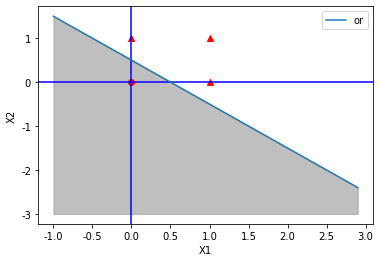

In [20]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

x1 = np.arange(-1, 3, 0.1)
x2 = -x1 + 0.5

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes

# 그래프 그리기
plt.plot(x1, x2, label="or")
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름
plt.legend()

plt.fill_between(x1, x2, -3, color='grey', alpha= 0.5)

plt.scatter([0],[0],marker='o',color='r')
plt.scatter([1,0,1],[0,1,1],marker='^',color='r')
plt.show()

OR 게이트는 (x1,x2)=(0,0)일 때 0을 출력(원으로 표시). (0,1),(1,0),(1,1)일 때 1을 출력(세모로 표시)

XOR 게이트를 직선 하나로 0과 1을 나누는 영역을 만들 수 있을까?

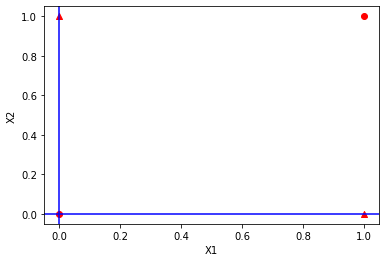

In [19]:
x1 = np.arange(-1, 3, 0.1)
x2 = -x1 + 0.5

plt.axvline(x=0, color = 'b')  # draw x =0 axes
plt.axhline(y=0, color = 'b')   # draw y =0 axes
plt.xlabel("X1") # x축 이름
plt.ylabel("X2") # y축 이름

plt.scatter([0,1],[0,1],marker='o',color='r')
plt.scatter([1,0],[0,1],marker='^',color='r')
plt.show()

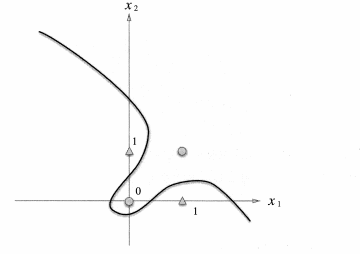

In [21]:
from IPython.display import Image, display
display(Image(filename='img/1_2_1.png', embed=True))

XOR 게이트는 이와 같이 비선형의 영역으로 나뉠 수 있다.

### 기존 게이트 조합하기

단층 퍼셉트론으로 표현할 수 없었던 XOR게이트를 다층 퍼셉트론으로 만들 수 있다. 

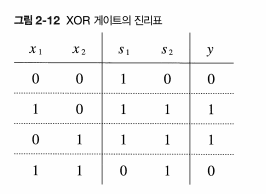

In [26]:
display(Image(filename='img/1_2_2.png', embed=True))

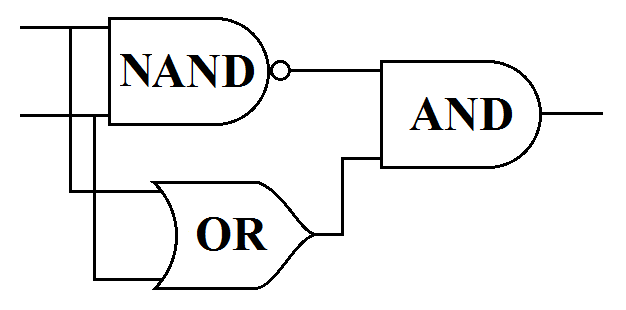

In [27]:
display(Image(filename='img/1_2_3.png', embed=True))

### XOR게이트 구현

In [24]:
# coding: utf-8

def XOR(x1, x2):
    #위에 구현했던 게이트를 조합하기
    s1 = NAND(x1, x2) 
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## 정리

* 퍼셉트론 = 입출력을 갖춘 알고리즘
* 가중치와 편향을 매개변수로 설정
* 단층 퍼셉트론은 직선형 영역만 표시, 다층 퍼셉트론은 비선형 영역도 표현가능
* 다층 퍼셉트론의 한계를 극복한 것이 신경망

## 참고자료

* https://nbviewer.jupyter.org/github/SDRLurker/deep-learning/blob/master/2%EC%9E%A5.ipynb

* https://github.com/WegraLee/deep-learning-from-scratch/tree/master/ch02